In [34]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [19]:
class Non_Stationary:
    def __init__(self, k, recursion):
        self.k = k
        self.epsilon = 0.1
        self.recursion = recursion
        self.reward = np.zeros(k)
        self.values = np.full(k, 10.0)
        self.all_rewards = np.zeros((k, recursion))
        self.times = np.zeros(k)

    def value_change(self):
        for i in range(self.k):
            self.values[i] += np.random.normal(loc=0, scale=0.01)
    
    def get_reward(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        reward = self.values[i]
        self.all_rewards[i][t] = reward
        self.reward[i] = reward
        self.times[i] += 1
        return reward
        
    def reward_estimation(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        q = 0
        t = int(self.times[i])
        for j in range(t):
            q = q + (1-self.epsilon)**(self.times[i] - j)*self.epsilon*self.all_rewards[i][j]
        # q = q + [(1-self.epsilon)**self.times[i]]*10
        self.reward[i] = q     


object = Non_Stationary(10, 10000)
epsilon = 0.1
total_reward = 0
x = 0

while x < 9999:
    if x > 0:
        object.value_change()
    if np.random.uniform(0, 1) > epsilon:
        action = int(np.argmax(object.reward))
    else:
        action = random.randint(0, object.k-1)
    
    rew = object.get_reward(action)
    print(rew)
    object.reward_estimation(action)
    total_reward += rew


print(f"Final Total Reward: {total_reward}")
print(f"Estimated Action Values: {object.reward}")
print(f"True Action Values: {object.values}")

10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0


IndexError: index 10000 is out of bounds for axis 0 with size 10000

In [3]:
for i in range(1):
    print(i)

0


Final Total Reward: 218864.41694386565
Estimated Action Values: [ 8.03023748 10.17590772 10.31753834  9.42488025 11.28379257 10.08050747
 10.43012837  9.78803866  8.02424187 11.95852348]
True Action Values: [ 7.93953051 10.51159961 10.49513332  9.53725798 11.20495972 10.41871007
 10.02372448  9.82149057  8.11020284 11.92140041]
Times for each: [  661.   619.   586.   586.  1082.   746.  1307.   574.   603. 13236.]


ValueError: x and y must have same first dimension, but have shapes (20000,) and (10000,)

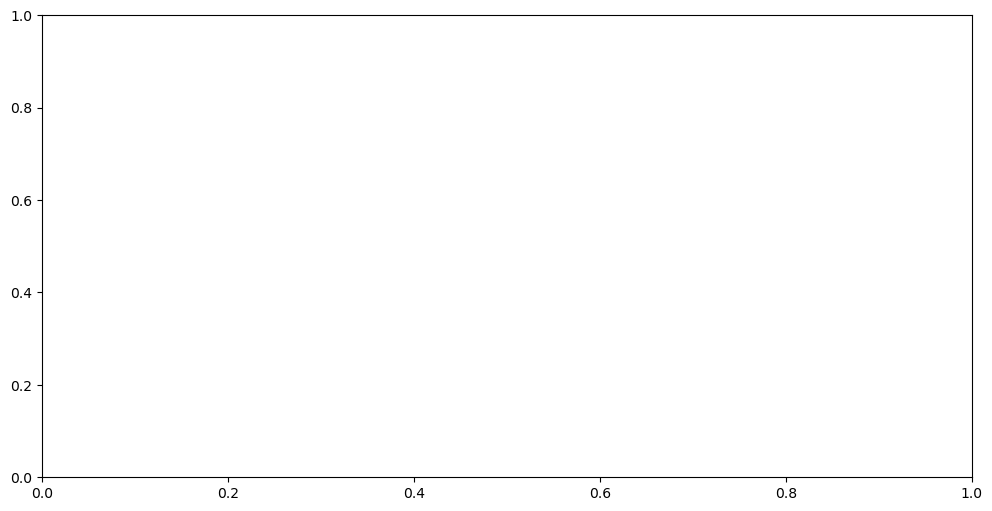

In [29]:

class Non_Stationary:
    def __init__(self, k, recursion):
        self.k = k
        self.alpha = 0.1
        self.recursion = recursion
        self.reward = np.zeros(k)
        self.values = np.full(k, 10.0)
        self.all_rewards = np.zeros((k, recursion))
        self.times = np.zeros(k)
    
    def value_change(self):
        for i in range(self.k):
            self.values[i] += np.random.normal(loc=0, scale=0.01)
    
    def get_reward(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        reward = np.random.normal(loc=self.values[i], scale=0.01)
        self.all_rewards[i][t] = reward
        self.times[i] += 1
        return reward
        
    def reward_estimation(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        if t == 0:
            return 0
        q = 0
        for j in range(t):
            q += self.alpha * (1 - self.alpha)**(t - j - 1) * self.all_rewards[i][j]
        self.reward[i] = q
        return q

# Main execution
object = Non_Stationary(10, 20000)
epsilon = 0.5
total_reward = 0
optimal_actions = []
chosen_optimal = []

for x in range(20000):
    if x > 0:
        object.value_change()
    
    # Determine the optimal action
    optimal_action = np.argmax(object.values)
    optimal_actions.append(optimal_action)
    
    if np.random.uniform(0, 1) > epsilon:
        action = int(np.argmax([object.reward_estimation(i) for i in range(object.k)]))
    else:
        action = random.randint(0, object.k-1)
    
    # Check if chosen action was optimal
    chosen_optimal.append(action == optimal_action)
    
    rew = object.get_reward(action)
    object.reward_estimation(action)
    # print(action, ' ', rew, ' ', est)
    total_reward += rew
    # if x % 1000 == 0 and x > 0:
    #     epsilon = max(0, epsilon - 0.01)
    if x % 4000 == 0 and x > 0:
        epsilon = max(0, epsilon - 0.1)
print(f"Final Total Reward: {total_reward}")
print(f"Estimated Action Values: {object.reward}")
print(f"True Action Values: {object.values}")
print(f"Times for each: {object.times}")

# Calculate the percentage of optimal actions chosen
optimal_percentage = [sum(chosen_optimal[:i+1]) / (i+1) * 100 for i in range(10000)]

# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20001), optimal_percentage)
plt.title('Percentage of Optimal Actions Chosen Over Time')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Optimal Actions (%)')
plt.grid(True)
plt.show()

Final Total Reward: 103713.38855267027
Estimated Action Values: [10.83341766  7.64633837  9.81622625  8.71509972  8.08063643  7.35571735
  9.06028544  9.67046497  8.50246393  8.49959989]
True Action Values: [10.82947279  8.81948231  8.53225368 11.10622702  9.27008114  9.57308209
 11.20760989  9.74336929  8.90169281  8.58688703]
Times for each: [8337.   14. 1513.   20.   19.   14.   19.   29.   16.   19.]


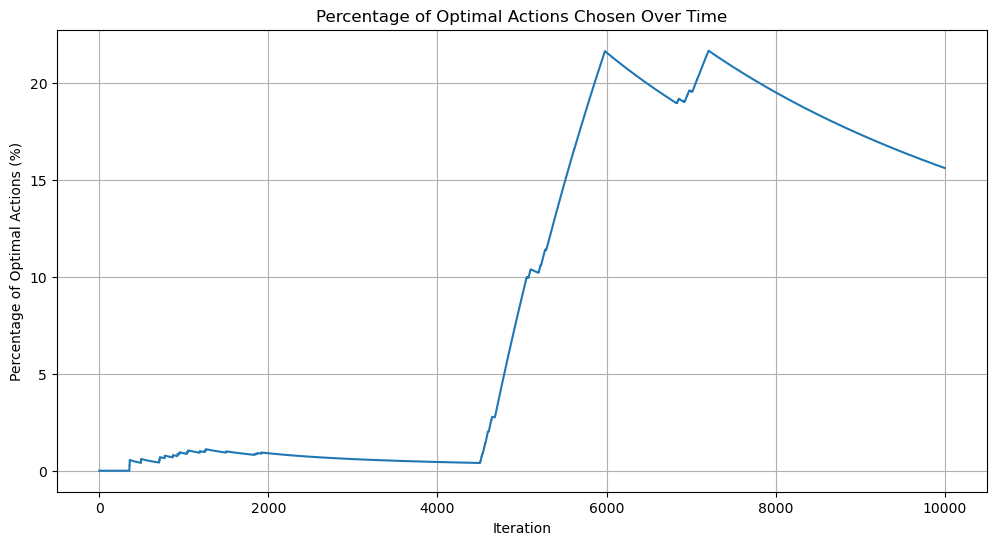

In [28]:
# 10,000 iterations epsilon = 0.1 for first 2000 iterations then 0


class Non_Stationary:
    def __init__(self, k, recursion):
        self.k = k
        self.alpha = 0.1
        self.recursion = recursion
        self.reward = np.zeros(k)
        self.values = np.full(k, 10.0)
        self.all_rewards = np.zeros((k, recursion))
        self.times = np.zeros(k)
    
    def value_change(self):
        for i in range(self.k):
            self.values[i] += np.random.normal(loc=0, scale=0.01)
    
    def get_reward(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        reward = np.random.normal(loc=self.values[i], scale=0.01)
        self.all_rewards[i][t] = reward
        self.times[i] += 1
        return reward
        
    def reward_estimation(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        if t == 0:
            return 0
        q = 0
        for j in range(t):
            q += self.alpha * (1 - self.alpha)**(t - j - 1) * self.all_rewards[i][j]
        self.reward[i] = q
        return q

# Main execution
object = Non_Stationary(10, 10000)
epsilon = 0.1
total_reward = 0
optimal_actions = []
chosen_optimal = []

for x in range(10000):
    if x > 0:
        object.value_change()
    
    # Determine the optimal action
    optimal_action = np.argmax(object.values)
    optimal_actions.append(optimal_action)
    
    if np.random.uniform(0, 1) > epsilon:
        action = int(np.argmax([object.reward_estimation(i) for i in range(object.k)]))
    else:
        action = random.randint(0, object.k-1)
    
    # Check if chosen action was optimal
    chosen_optimal.append(action == optimal_action)
    
    rew = object.get_reward(action)
    object.reward_estimation(action)
    # print(action, ' ', rew, ' ', est)
    total_reward += rew
    if x % 2000 == 0 and x > 0:
        epsilon = max(0, epsilon - 0.1)
        
print(f"Final Total Reward: {total_reward}")
print(f"Estimated Action Values: {object.reward}")
print(f"True Action Values: {object.values}")
print(f"Times for each: {object.times}")

# Calculate the percentage of optimal actions chosen
optimal_percentage = [sum(chosen_optimal[:i+1]) / (i+1) * 100 for i in range(10000)]

# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10001), optimal_percentage)
plt.title('Percentage of Optimal Actions Chosen Over Time')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Optimal Actions (%)')
plt.grid(True)
plt.show()

Final Total Reward: 112524.7642830986
Estimated Action Values: [ 9.35455168 12.47339899 10.28741241  9.49324477 11.79643536 10.10881083
 11.35448721  9.25273351 10.42057943  9.78639648]
True Action Values: [ 9.43572285 12.47556968 10.101839    9.51345091 11.77823183 10.19833083
 11.36640017  9.31633328 10.27333931  9.55784742]
Times for each: [ 608. 4756.  278.  553. 2288.  298.  299.  332.  294.  294.]


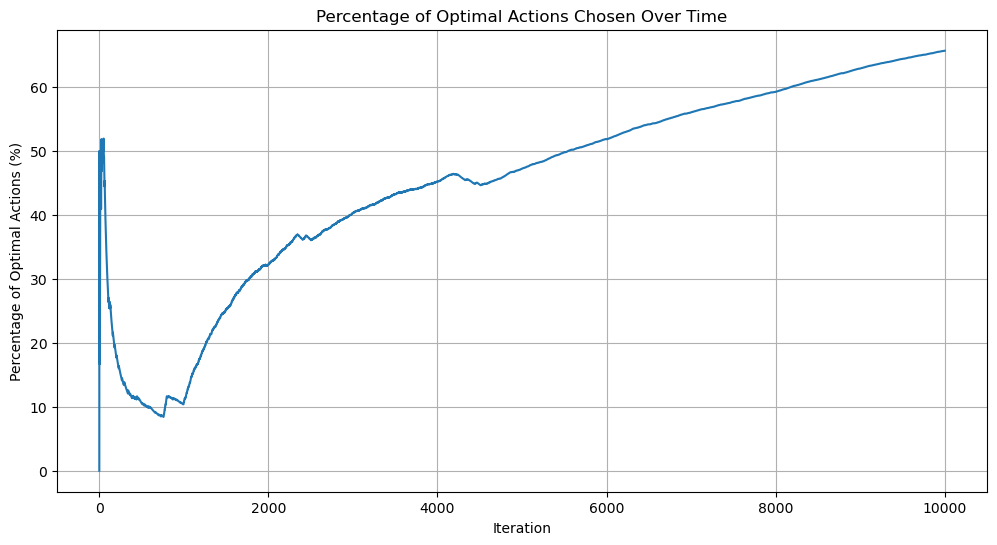

In [30]:
# 10,000 iteration epsilon =0.5 dec by 0.1 for every 2000



class Non_Stationary:
    def __init__(self, k, recursion):
        self.k = k
        self.alpha = 0.1
        self.recursion = recursion
        self.reward = np.zeros(k)
        self.values = np.full(k, 10.0)
        self.all_rewards = np.zeros((k, recursion))
        self.times = np.zeros(k)
    
    def value_change(self):
        for i in range(self.k):
            self.values[i] += np.random.normal(loc=0, scale=0.01)
    
    def get_reward(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        reward = np.random.normal(loc=self.values[i], scale=0.01)
        self.all_rewards[i][t] = reward
        self.times[i] += 1
        return reward
        
    def reward_estimation(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        if t == 0:
            return 0
        q = 0
        for j in range(t):
            q += self.alpha * (1 - self.alpha)**(t - j - 1) * self.all_rewards[i][j]
        self.reward[i] = q
        return q

# Main execution
object = Non_Stationary(10, 10000)
epsilon = 0.5
total_reward = 0
optimal_actions = []
chosen_optimal = []

for x in range(10000):
    if x > 0:
        object.value_change()
    
    # Determine the optimal action
    optimal_action = np.argmax(object.values)
    optimal_actions.append(optimal_action)
    
    if np.random.uniform(0, 1) > epsilon:
        action = int(np.argmax([object.reward_estimation(i) for i in range(object.k)]))
    else:
        action = random.randint(0, object.k-1)
    
    # Check if chosen action was optimal
    chosen_optimal.append(action == optimal_action)
    
    rew = object.get_reward(action)
    object.reward_estimation(action)
    # print(action, ' ', rew, ' ', est)
    total_reward += rew
    # if x % 1000 == 0 and x > 0:
    #     epsilon = max(0, epsilon - 0.01)
    if x % 2000 == 0 and x > 0:
        epsilon = max(0, epsilon - 0.1)
print(f"Final Total Reward: {total_reward}")
print(f"Estimated Action Values: {object.reward}")
print(f"True Action Values: {object.values}")
print(f"Times for each: {object.times}")

# Calculate the percentage of optimal actions chosen
optimal_percentage = [sum(chosen_optimal[:i+1]) / (i+1) * 100 for i in range(10000)]

# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10001), optimal_percentage)
plt.title('Percentage of Optimal Actions Chosen Over Time')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Optimal Actions (%)')
plt.grid(True)
plt.show()

Final Total Reward: 224046.24566426818
Estimated Action Values: [11.56882265  9.62701467 10.22951685 11.2326527  11.05191398 10.48883805
 11.44501955  9.25462058  8.09370642  8.03132309]
True Action Values: [11.56360238  9.86980469 10.34464012 11.41193384 11.10328827 10.52980052
 11.86758516  9.45652872  8.10456578  7.52231185]


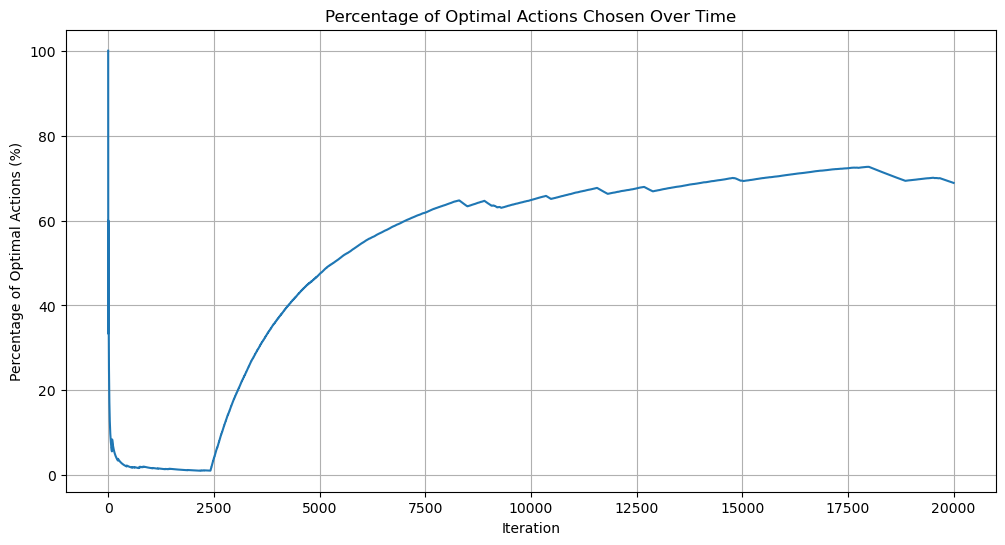

In [31]:
# 20,000 iterations constant epsilon =0.1


import numpy as np
import random
import matplotlib.pyplot as plt

class Non_Stationary:
    def __init__(self, k, max_iterations):
        self.k = k
        self.alpha = 0.1
        self.max_iterations = max_iterations
        self.reward = np.zeros(k)
        self.values = np.full(k, 10.0)
        self.all_rewards = [[] for _ in range(k)]  # Use lists instead of fixed-size arrays
        self.times = np.zeros(k)
    
    def value_change(self):
        for i in range(self.k):
            self.values[i] += np.random.normal(loc=0, scale=0.01)
    
    def get_reward(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        reward = np.random.normal(loc=self.values[i], scale=0.01)
        self.all_rewards[i].append(reward)  # Append to list instead of indexing
        self.times[i] += 1
        return reward
        
    def reward_estimation(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        if t == 0:
            return 0
        q = 0
        for j in range(t):
            q += self.alpha * (1 - self.alpha)**(t - j - 1) * self.all_rewards[i][j]
        self.reward[i] = q
        return q

# Main execution
num_iterations = 20000
object = Non_Stationary(10, num_iterations)
epsilon = 0.1
total_reward = 0
optimal_actions = []
chosen_optimal = []

for x in range(num_iterations):
    if x > 0:
        object.value_change()
    
    # Determine the optimal action
    optimal_action = np.argmax(object.values)
    optimal_actions.append(optimal_action)
    
    if np.random.uniform(0, 1) > epsilon:
        action = int(np.argmax([object.reward_estimation(i) for i in range(object.k)]))
    else:
        action = random.randint(0, object.k-1)
    
    # Check if chosen action was optimal
    chosen_optimal.append(action == optimal_action)
    
    rew = object.get_reward(action)
    est = object.reward_estimation(action)
    total_reward += rew

print(f"Final Total Reward: {total_reward}")
print(f"Estimated Action Values: {object.reward}")
print(f"True Action Values: {object.values}")

# Calculate the percentage of optimal actions chosen
optimal_percentage = [sum(chosen_optimal[:i+1]) / (i+1) * 100 for i in range(num_iterations)]

# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_iterations + 1), optimal_percentage)
plt.title('Percentage of Optimal Actions Chosen Over Time')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Optimal Actions (%)')
plt.grid(True)
plt.show()

Final Total Reward: 233695.82655311815
Estimated Action Values: [ 8.96139484 11.19423889 11.36318384 11.5155988  11.57674752  8.67079041
 10.3508165   9.38283377 12.87235609 10.95462903]
True Action Values: [ 6.76678637 13.06995302 14.19963725 10.98695151 12.40601307  9.83732695
 10.31195637  9.25181753 12.8532004  11.14973347]


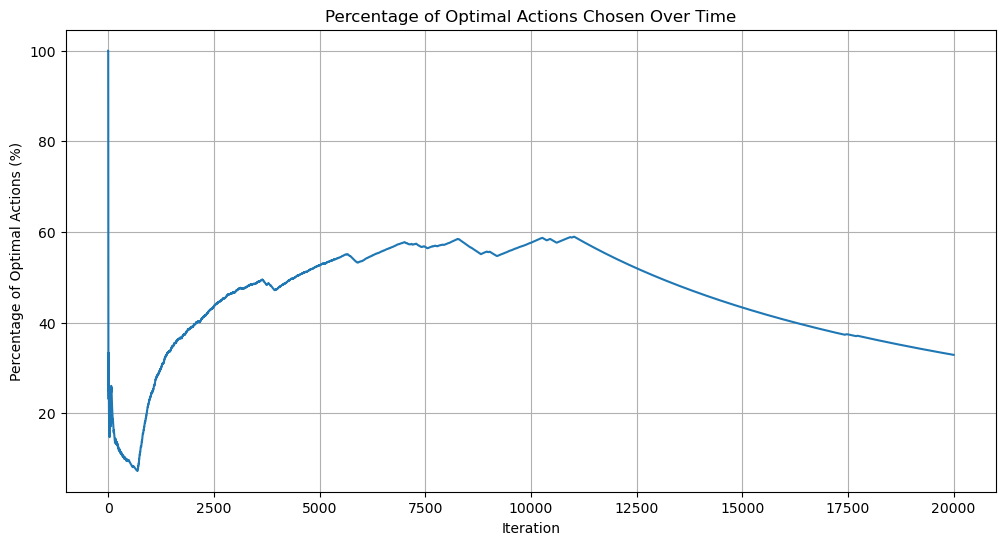

In [33]:
# 20,000 recursion epsilon =0.5 dec by 0.1 every 2000 iteratons



class Non_Stationary:
    def __init__(self, k, max_iterations):
        self.k = k
        self.alpha = 0.1
        self.max_iterations = max_iterations
        self.reward = np.zeros(k)
        self.values = np.full(k, 10.0)
        self.all_rewards = [[] for _ in range(k)]  # Use lists instead of fixed-size arrays
        self.times = np.zeros(k)
    
    def value_change(self):
        for i in range(self.k):
            self.values[i] += np.random.normal(loc=0, scale=0.01)
    
    def get_reward(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        reward = np.random.normal(loc=self.values[i], scale=0.01)
        self.all_rewards[i].append(reward)  # Append to list instead of indexing
        self.times[i] += 1
        return reward
        
    def reward_estimation(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        if t == 0:
            return 0
        q = 0
        for j in range(t):
            q += self.alpha * (1 - self.alpha)**(t - j - 1) * self.all_rewards[i][j]
        self.reward[i] = q
        return q

# Main execution
num_iterations = 20000
object = Non_Stationary(10, num_iterations)
epsilon = 0.5
total_reward = 0
optimal_actions = []
chosen_optimal = []

for x in range(num_iterations):
    if x > 0:
        object.value_change()
    
    # Determine the optimal action
    optimal_action = np.argmax(object.values)
    optimal_actions.append(optimal_action)
    
    if np.random.uniform(0, 1) > epsilon:
        action = int(np.argmax([object.reward_estimation(i) for i in range(object.k)]))
    else:
        action = random.randint(0, object.k-1)
    
    # Check if chosen action was optimal
    chosen_optimal.append(action == optimal_action)
    
    rew = object.get_reward(action)
    est = object.reward_estimation(action)
    total_reward += rew
    if x % 2000 == 0 and x > 0:
        epsilon = max(0, epsilon - 0.1)
print(f"Final Total Reward: {total_reward}")
print(f"Estimated Action Values: {object.reward}")
print(f"True Action Values: {object.values}")

# Calculate the percentage of optimal actions chosen
optimal_percentage = [sum(chosen_optimal[:i+1]) / (i+1) * 100 for i in range(num_iterations)]

# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_iterations + 1), optimal_percentage)
plt.title('Percentage of Optimal Actions Chosen Over Time')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Optimal Actions (%)')
plt.grid(True)
plt.show()

Final Total Reward: 216518.91233807884
Estimated Action Values: [10.13584848 10.18674429 11.64275829  9.31236916  9.12133726  8.08082135
 10.22806361 10.86146741  9.69771565 10.19517609]
True Action Values: [10.46445331 10.15286074 11.61086045  9.42803548  9.25985043  7.86131042
 10.03174515 10.87264905  9.662402   10.40222743]


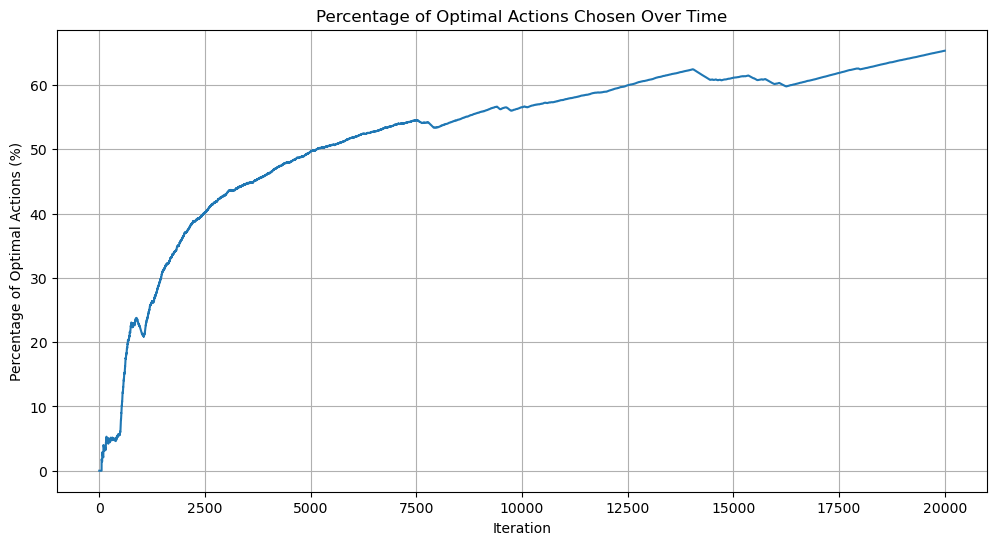

In [35]:
# 20,000 recursion epsilon =0.5 dec by 0.1 every 4000 iteratons




class Non_Stationary:
    def __init__(self, k, max_iterations):
        self.k = k
        self.alpha = 0.1
        self.max_iterations = max_iterations
        self.reward = np.zeros(k)
        self.values = np.full(k, 10.0)
        self.all_rewards = [[] for _ in range(k)]  # Use lists instead of fixed-size arrays
        self.times = np.zeros(k)
    
    def value_change(self):
        for i in range(self.k):
            self.values[i] += np.random.normal(loc=0, scale=0.01)
    
    def get_reward(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        reward = np.random.normal(loc=self.values[i], scale=0.01)
        self.all_rewards[i].append(reward)  # Append to list instead of indexing
        self.times[i] += 1
        return reward
        
    def reward_estimation(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        if t == 0:
            return 0
        q = 0
        for j in range(t):
            q += self.alpha * (1 - self.alpha)**(t - j - 1) * self.all_rewards[i][j]
        self.reward[i] = q
        return q

# Main execution
num_iterations = 20000
object = Non_Stationary(10, num_iterations)
epsilon = 0.5
total_reward = 0
optimal_actions = []
chosen_optimal = []

for x in range(num_iterations):
    if x > 0:
        object.value_change()
    
    # Determine the optimal action
    optimal_action = np.argmax(object.values)
    optimal_actions.append(optimal_action)
    
    if np.random.uniform(0, 1) > epsilon:
        action = int(np.argmax([object.reward_estimation(i) for i in range(object.k)]))
    else:
        action = random.randint(0, object.k-1)
    
    # Check if chosen action was optimal
    chosen_optimal.append(action == optimal_action)
    
    rew = object.get_reward(action)
    est = object.reward_estimation(action)
    total_reward += rew
    if x % 4000 == 0 and x > 0:
        epsilon = max(0, epsilon - 0.1)
print(f"Final Total Reward: {total_reward}")
print(f"Estimated Action Values: {object.reward}")
print(f"True Action Values: {object.values}")

# Calculate the percentage of optimal actions chosen
optimal_percentage = [sum(chosen_optimal[:i+1]) / (i+1) * 100 for i in range(num_iterations)]

# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_iterations + 1), optimal_percentage)
plt.title('Percentage of Optimal Actions Chosen Over Time')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Optimal Actions (%)')
plt.grid(True)
plt.show()

Final Total Reward: 216657.14536948776
Estimated Action Values: [10.50694555 10.41667962  7.62525339 10.50927342 10.41969226  9.85358721
  8.76064836 10.51107636 10.51097362  8.88472674]
True Action Values: [10.18301725 10.8808786   6.72564488 10.47930817 11.19479178 10.89528662
  8.08345455 10.42634331 10.46432918  8.64504228]


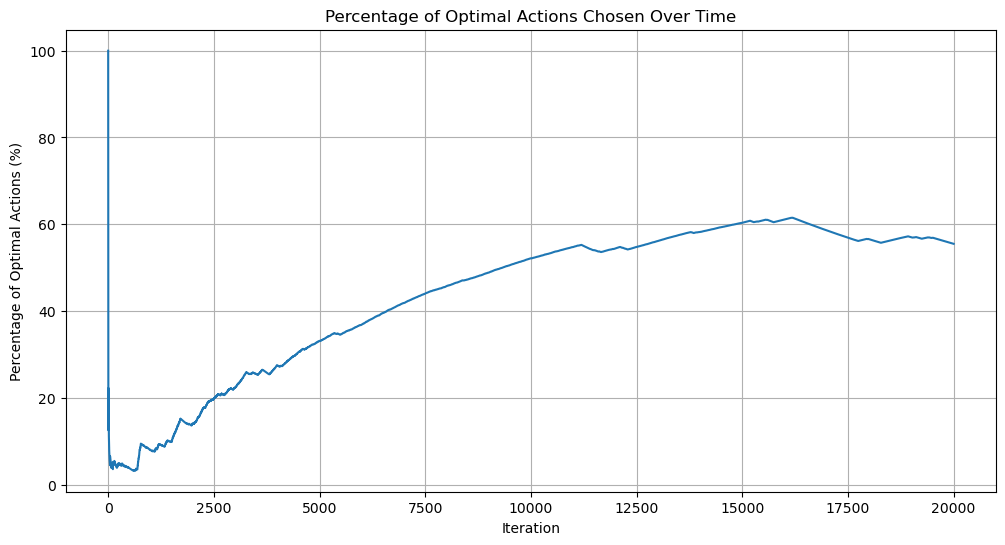

In [36]:
# 20,000 recursion epsilon =0.5 dec by 0.1 every 3000 iteratons



class Non_Stationary:
    def __init__(self, k, max_iterations):
        self.k = k
        self.alpha = 0.1
        self.max_iterations = max_iterations
        self.reward = np.zeros(k)
        self.values = np.full(k, 10.0)
        self.all_rewards = [[] for _ in range(k)]  # Use lists instead of fixed-size arrays
        self.times = np.zeros(k)
    
    def value_change(self):
        for i in range(self.k):
            self.values[i] += np.random.normal(loc=0, scale=0.01)
    
    def get_reward(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        reward = np.random.normal(loc=self.values[i], scale=0.01)
        self.all_rewards[i].append(reward)  # Append to list instead of indexing
        self.times[i] += 1
        return reward
        
    def reward_estimation(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        if t == 0:
            return 0
        q = 0
        for j in range(t):
            q += self.alpha * (1 - self.alpha)**(t - j - 1) * self.all_rewards[i][j]
        self.reward[i] = q
        return q

# Main execution
num_iterations = 20000
object = Non_Stationary(10, num_iterations)
epsilon = 0.5
total_reward = 0
optimal_actions = []
chosen_optimal = []

for x in range(num_iterations):
    if x > 0:
        object.value_change()
    
    # Determine the optimal action
    optimal_action = np.argmax(object.values)
    optimal_actions.append(optimal_action)
    
    if np.random.uniform(0, 1) > epsilon:
        action = int(np.argmax([object.reward_estimation(i) for i in range(object.k)]))
    else:
        action = random.randint(0, object.k-1)
    
    # Check if chosen action was optimal
    chosen_optimal.append(action == optimal_action)
    
    rew = object.get_reward(action)
    est = object.reward_estimation(action)
    total_reward += rew
    if x % 3000 == 0 and x > 0:
        epsilon = max(0, epsilon - 0.1)
print(f"Final Total Reward: {total_reward}")
print(f"Estimated Action Values: {object.reward}")
print(f"True Action Values: {object.values}")

# Calculate the percentage of optimal actions chosen
optimal_percentage = [sum(chosen_optimal[:i+1]) / (i+1) * 100 for i in range(num_iterations)]

# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_iterations + 1), optimal_percentage)
plt.title('Percentage of Optimal Actions Chosen Over Time')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Optimal Actions (%)')
plt.grid(True)
plt.show()

Final Total Reward: 214237.84319134217
Estimated Action Values: [ 9.72515863 11.15377697  9.69173768 10.67785634 10.11253279  9.92443347
  9.50282508  8.62473049  9.85811485  8.66337033]
True Action Values: [ 9.71625377 11.16186796  9.483493   10.72164575  9.86680465  9.98176486
  9.27338362  8.69096979  9.78263755  8.56948767]


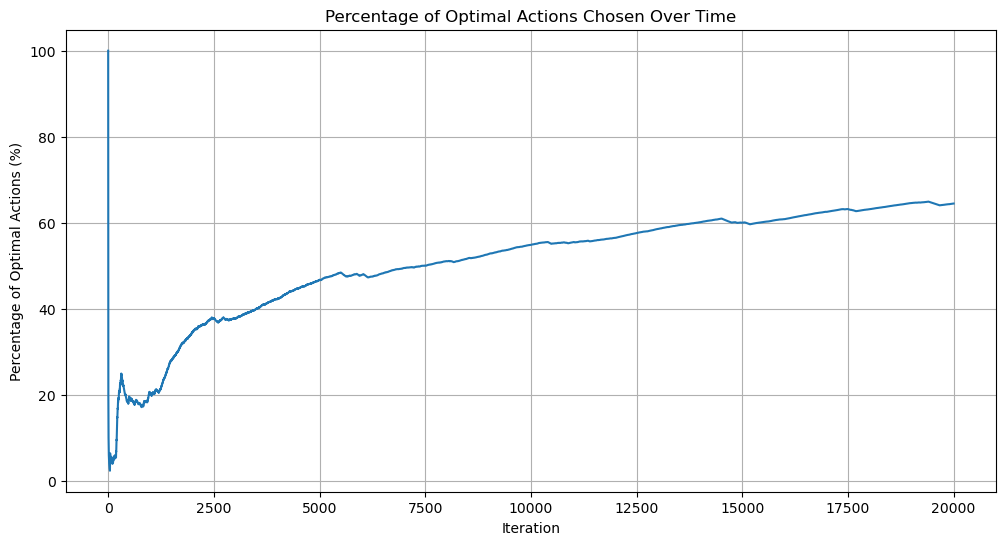

In [37]:
# 20,000 recursion epsilon =0.5 dec by 0.1 every 4000 iteratons
# alpha = 0.2



class Non_Stationary:
    def __init__(self, k, max_iterations):
        self.k = k
        self.alpha = 0.2
        self.max_iterations = max_iterations
        self.reward = np.zeros(k)
        self.values = np.full(k, 10.0)
        self.all_rewards = [[] for _ in range(k)]  # Use lists instead of fixed-size arrays
        self.times = np.zeros(k)
    
    def value_change(self):
        for i in range(self.k):
            self.values[i] += np.random.normal(loc=0, scale=0.01)
    
    def get_reward(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        reward = np.random.normal(loc=self.values[i], scale=0.01)
        self.all_rewards[i].append(reward)  # Append to list instead of indexing
        self.times[i] += 1
        return reward
        
    def reward_estimation(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        if t == 0:
            return 0
        q = 0
        for j in range(t):
            q += self.alpha * (1 - self.alpha)**(t - j - 1) * self.all_rewards[i][j]
        self.reward[i] = q
        return q

# Main execution
num_iterations = 20000
object = Non_Stationary(10, num_iterations)
epsilon = 0.5
total_reward = 0
optimal_actions = []
chosen_optimal = []

for x in range(num_iterations):
    if x > 0:
        object.value_change()
    
    # Determine the optimal action
    optimal_action = np.argmax(object.values)
    optimal_actions.append(optimal_action)
    
    if np.random.uniform(0, 1) > epsilon:
        action = int(np.argmax([object.reward_estimation(i) for i in range(object.k)]))
    else:
        action = random.randint(0, object.k-1)
    
    # Check if chosen action was optimal
    chosen_optimal.append(action == optimal_action)
    
    rew = object.get_reward(action)
    est = object.reward_estimation(action)
    total_reward += rew
    if x % 4000 == 0 and x > 0:
        epsilon = max(0, epsilon - 0.1)
print(f"Final Total Reward: {total_reward}")
print(f"Estimated Action Values: {object.reward}")
print(f"True Action Values: {object.values}")

# Calculate the percentage of optimal actions chosen
optimal_percentage = [sum(chosen_optimal[:i+1]) / (i+1) * 100 for i in range(num_iterations)]

# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_iterations + 1), optimal_percentage)
plt.title('Percentage of Optimal Actions Chosen Over Time')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Optimal Actions (%)')
plt.grid(True)
plt.show()

Final Total Reward: 106930.27679029768
Estimated Action Values: [10.63729109  9.76785903 11.39921071 10.04698699  9.65443578  8.17849872
  9.73215356  8.76925149 11.19917601  9.641209  ]
True Action Values: [10.63008577  9.80097677 11.39007197 10.15359267  9.46623357  8.00955724
  9.58117177  9.0925081  11.46629142  9.6633839 ]
Times for each: [ 312.  279. 4740.  304.  487.  312.  315.  380. 2572.  299.]


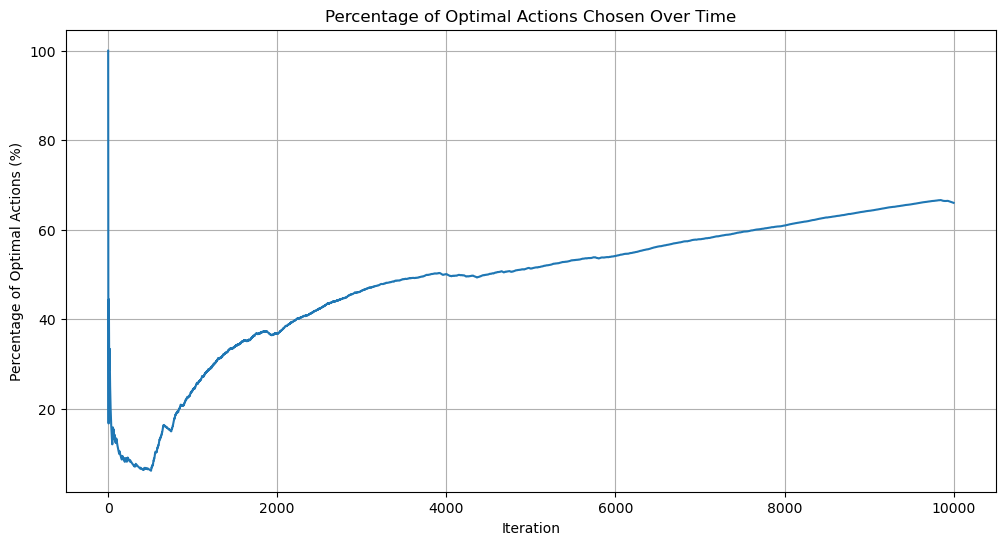

In [38]:
# 10,000 iteration epsilon =0.5 dec by 0.1 for every 2000
# alpha =0.2


class Non_Stationary:
    def __init__(self, k, recursion):
        self.k = k
        self.alpha = 0.2
        self.recursion = recursion
        self.reward = np.zeros(k)
        self.values = np.full(k, 10.0)
        self.all_rewards = np.zeros((k, recursion))
        self.times = np.zeros(k)
    
    def value_change(self):
        for i in range(self.k):
            self.values[i] += np.random.normal(loc=0, scale=0.01)
    
    def get_reward(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        reward = np.random.normal(loc=self.values[i], scale=0.01)
        self.all_rewards[i][t] = reward
        self.times[i] += 1
        return reward
        
    def reward_estimation(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        if t == 0:
            return 0
        q = 0
        for j in range(t):
            q += self.alpha * (1 - self.alpha)**(t - j - 1) * self.all_rewards[i][j]
        self.reward[i] = q
        return q

# Main execution
object = Non_Stationary(10, 10000)
epsilon = 0.5
total_reward = 0
optimal_actions = []
chosen_optimal = []

for x in range(10000):
    if x > 0:
        object.value_change()
    
    # Determine the optimal action
    optimal_action = np.argmax(object.values)
    optimal_actions.append(optimal_action)
    
    if np.random.uniform(0, 1) > epsilon:
        action = int(np.argmax([object.reward_estimation(i) for i in range(object.k)]))
    else:
        action = random.randint(0, object.k-1)
    
    # Check if chosen action was optimal
    chosen_optimal.append(action == optimal_action)
    
    rew = object.get_reward(action)
    object.reward_estimation(action)
    # print(action, ' ', rew, ' ', est)
    total_reward += rew
    # if x % 1000 == 0 and x > 0:
    #     epsilon = max(0, epsilon - 0.01)
    if x % 2000 == 0 and x > 0:
        epsilon = max(0, epsilon - 0.1)
print(f"Final Total Reward: {total_reward}")
print(f"Estimated Action Values: {object.reward}")
print(f"True Action Values: {object.values}")
print(f"Times for each: {object.times}")

# Calculate the percentage of optimal actions chosen
optimal_percentage = [sum(chosen_optimal[:i+1]) / (i+1) * 100 for i in range(10000)]

# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10001), optimal_percentage)
plt.title('Percentage of Optimal Actions Chosen Over Time')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Optimal Actions (%)')
plt.grid(True)
plt.show()

Final Total Reward: 213944.2750180113
Estimated Action Values: [11.22375684  6.58656387  8.65675974 10.79172975  8.19052048 10.93145015
  7.76973814  7.68969323 10.75729203 11.31296465]
True Action Values: [11.14015018  6.48485582  8.7578005  10.70738351  8.3070036  10.94132047
  7.806186    7.71941944 10.5786716  11.31948218]


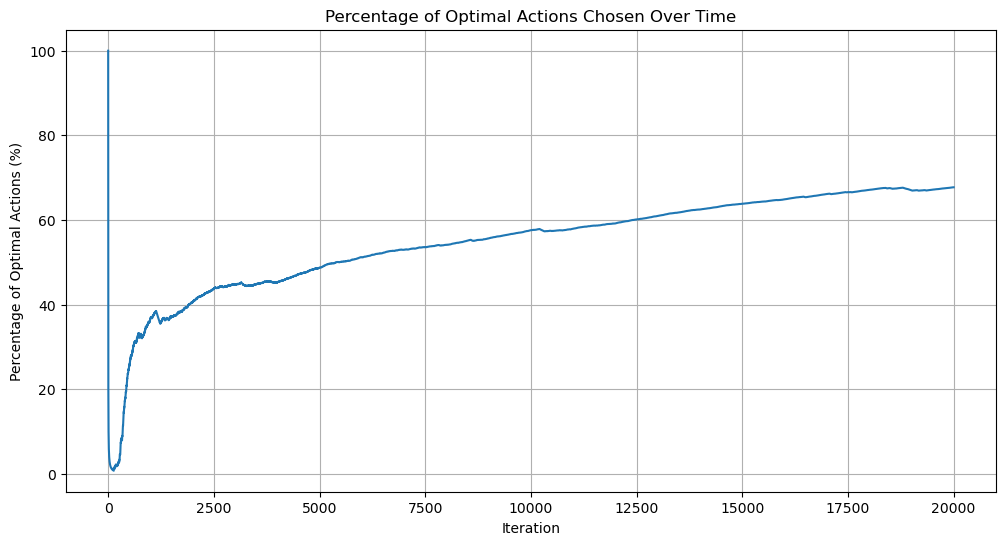

In [39]:
# 20,000 recursion epsilon =0.5 dec by 0.1 every 4000 iteratons
# alpha = 0.3



class Non_Stationary:
    def __init__(self, k, max_iterations):
        self.k = k
        self.alpha = 0.3
        self.max_iterations = max_iterations
        self.reward = np.zeros(k)
        self.values = np.full(k, 10.0)
        self.all_rewards = [[] for _ in range(k)]  # Use lists instead of fixed-size arrays
        self.times = np.zeros(k)
    
    def value_change(self):
        for i in range(self.k):
            self.values[i] += np.random.normal(loc=0, scale=0.01)
    
    def get_reward(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        reward = np.random.normal(loc=self.values[i], scale=0.01)
        self.all_rewards[i].append(reward)  # Append to list instead of indexing
        self.times[i] += 1
        return reward
        
    def reward_estimation(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        if t == 0:
            return 0
        q = 0
        for j in range(t):
            q += self.alpha * (1 - self.alpha)**(t - j - 1) * self.all_rewards[i][j]
        self.reward[i] = q
        return q

# Main execution
num_iterations = 20000
object = Non_Stationary(10, num_iterations)
epsilon = 0.5
total_reward = 0
optimal_actions = []
chosen_optimal = []

for x in range(num_iterations):
    if x > 0:
        object.value_change()
    
    # Determine the optimal action
    optimal_action = np.argmax(object.values)
    optimal_actions.append(optimal_action)
    
    if np.random.uniform(0, 1) > epsilon:
        action = int(np.argmax([object.reward_estimation(i) for i in range(object.k)]))
    else:
        action = random.randint(0, object.k-1)
    
    # Check if chosen action was optimal
    chosen_optimal.append(action == optimal_action)
    
    rew = object.get_reward(action)
    est = object.reward_estimation(action)
    total_reward += rew
    if x % 4000 == 0 and x > 0:
        epsilon = max(0, epsilon - 0.1)
print(f"Final Total Reward: {total_reward}")
print(f"Estimated Action Values: {object.reward}")
print(f"True Action Values: {object.values}")

# Calculate the percentage of optimal actions chosen
optimal_percentage = [sum(chosen_optimal[:i+1]) / (i+1) * 100 for i in range(num_iterations)]

# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_iterations + 1), optimal_percentage)
plt.title('Percentage of Optimal Actions Chosen Over Time')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Optimal Actions (%)')
plt.grid(True)
plt.show()

Final Total Reward: 348594.6781676052
Estimated Action Values: [12.3835594  10.31836592 12.46881675 10.66019704  9.92483038 10.73262839
 10.27646525  9.40481682 12.95997948 10.72414317]
True Action Values: [12.37024579 10.31557154 12.50783491 10.56736483  9.77146756 10.76029848
 10.18032176  9.50361319 12.95037026 10.58606114]


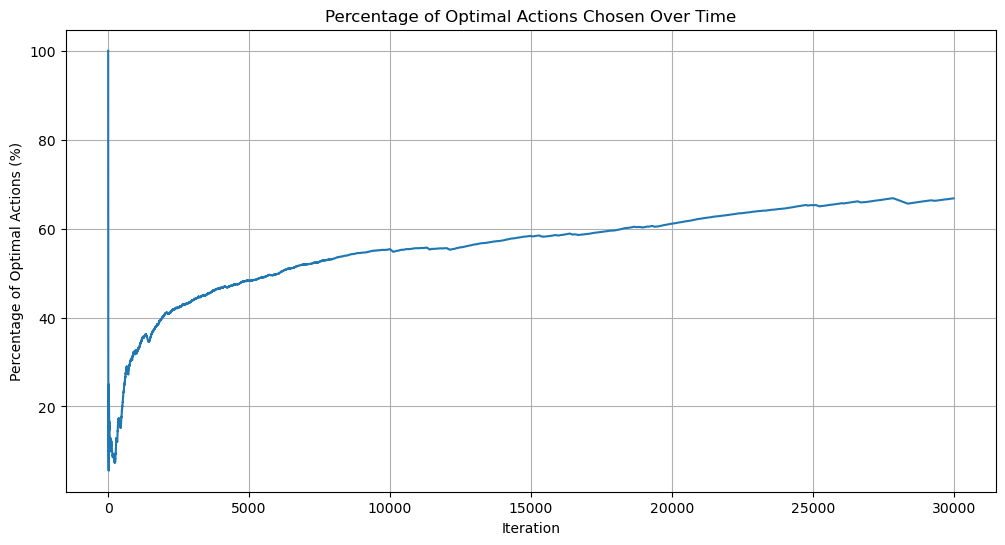

In [40]:
# 30,000 recursion epsilon =0.5 dec by 0.1 every 5000 iteratons
# alpha = 0.3



class Non_Stationary:
    def __init__(self, k, max_iterations):
        self.k = k
        self.alpha = 0.3
        self.max_iterations = max_iterations
        self.reward = np.zeros(k)
        self.values = np.full(k, 10.0)
        self.all_rewards = [[] for _ in range(k)]  # Use lists instead of fixed-size arrays
        self.times = np.zeros(k)
    
    def value_change(self):
        for i in range(self.k):
            self.values[i] += np.random.normal(loc=0, scale=0.01)
    
    def get_reward(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        reward = np.random.normal(loc=self.values[i], scale=0.01)
        self.all_rewards[i].append(reward)  # Append to list instead of indexing
        self.times[i] += 1
        return reward
        
    def reward_estimation(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        if t == 0:
            return 0
        q = 0
        for j in range(t):
            q += self.alpha * (1 - self.alpha)**(t - j - 1) * self.all_rewards[i][j]
        self.reward[i] = q
        return q

# Main execution
num_iterations = 30000
object = Non_Stationary(10, num_iterations)
epsilon = 0.5
total_reward = 0
optimal_actions = []
chosen_optimal = []

for x in range(num_iterations):
    if x > 0:
        object.value_change()
    
    # Determine the optimal action
    optimal_action = np.argmax(object.values)
    optimal_actions.append(optimal_action)
    
    if np.random.uniform(0, 1) > epsilon:
        action = int(np.argmax([object.reward_estimation(i) for i in range(object.k)]))
    else:
        action = random.randint(0, object.k-1)
    
    # Check if chosen action was optimal
    chosen_optimal.append(action == optimal_action)
    
    rew = object.get_reward(action)
    est = object.reward_estimation(action)
    total_reward += rew
    if x % 6000 == 0 and x > 0:
        epsilon = max(0, epsilon - 0.1)
print(f"Final Total Reward: {total_reward}")
print(f"Estimated Action Values: {object.reward}")
print(f"True Action Values: {object.values}")

# Calculate the percentage of optimal actions chosen
optimal_percentage = [sum(chosen_optimal[:i+1]) / (i+1) * 100 for i in range(num_iterations)]

# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_iterations + 1), optimal_percentage)
plt.title('Percentage of Optimal Actions Chosen Over Time')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Optimal Actions (%)')
plt.grid(True)
plt.show()

Final Total Reward: 344979.04278430686
Estimated Action Values: [ 9.79232156  9.3980109  11.32092686 10.96311878  9.51783564 13.6848919
 11.38817665 11.10750631 10.21248858  8.84276204]
True Action Values: [ 9.54800858  9.88704585 10.82741158 11.65052725 10.19652464 13.68649788
 11.6943573  11.49368191 10.07288684  8.36869513]


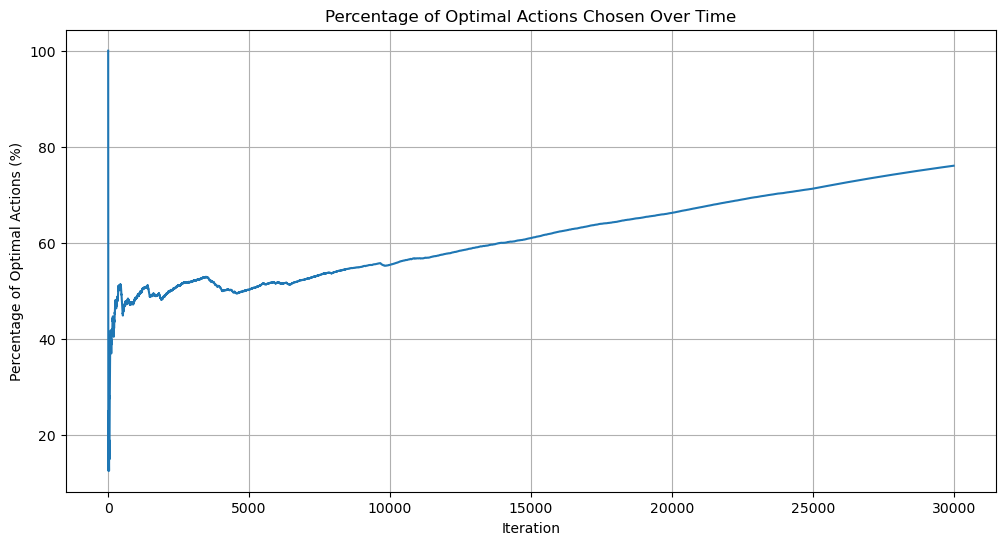

In [41]:
# 30,000 recursion epsilon =0.5 dec by 0.1 every 5000 iteratons
# alpha = 0.3



class Non_Stationary:
    def __init__(self, k, max_iterations):
        self.k = k
        self.alpha = 0.3
        self.max_iterations = max_iterations
        self.reward = np.zeros(k)
        self.values = np.full(k, 10.0)
        self.all_rewards = [[] for _ in range(k)]  # Use lists instead of fixed-size arrays
        self.times = np.zeros(k)
    
    def value_change(self):
        for i in range(self.k):
            self.values[i] += np.random.normal(loc=0, scale=0.01)
    
    def get_reward(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        reward = np.random.normal(loc=self.values[i], scale=0.01)
        self.all_rewards[i].append(reward)  # Append to list instead of indexing
        self.times[i] += 1
        return reward
        
    def reward_estimation(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        if t == 0:
            return 0
        q = 0
        for j in range(t):
            q += self.alpha * (1 - self.alpha)**(t - j - 1) * self.all_rewards[i][j]
        self.reward[i] = q
        return q

# Main execution
num_iterations = 30000
object = Non_Stationary(10, num_iterations)
epsilon = 0.5
total_reward = 0
optimal_actions = []
chosen_optimal = []

for x in range(num_iterations):
    if x > 0:
        object.value_change()
    
    # Determine the optimal action
    optimal_action = np.argmax(object.values)
    optimal_actions.append(optimal_action)
    
    if np.random.uniform(0, 1) > epsilon:
        action = int(np.argmax([object.reward_estimation(i) for i in range(object.k)]))
    else:
        action = random.randint(0, object.k-1)
    
    # Check if chosen action was optimal
    chosen_optimal.append(action == optimal_action)
    
    rew = object.get_reward(action)
    est = object.reward_estimation(action)
    total_reward += rew
    if x % 5000 == 0 and x > 0:
        epsilon = max(0, epsilon - 0.1)
print(f"Final Total Reward: {total_reward}")
print(f"Estimated Action Values: {object.reward}")
print(f"True Action Values: {object.values}")

# Calculate the percentage of optimal actions chosen
optimal_percentage = [sum(chosen_optimal[:i+1]) / (i+1) * 100 for i in range(num_iterations)]

# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_iterations + 1), optimal_percentage)
plt.title('Percentage of Optimal Actions Chosen Over Time')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Optimal Actions (%)')
plt.grid(True)
plt.show()

Final Total Reward: 333795.4664572117
Estimated Action Values: [ 8.31831547 11.89985423  9.566866    8.15033559 12.04362833  9.68767638
  6.39473434 10.1116502   8.24974345 10.46438719]
True Action Values: [ 8.21532146 11.77577232  9.61927679  8.24440944 12.03735048  9.63678826
  6.24240425 10.10336012  8.19883684 10.4494431 ]


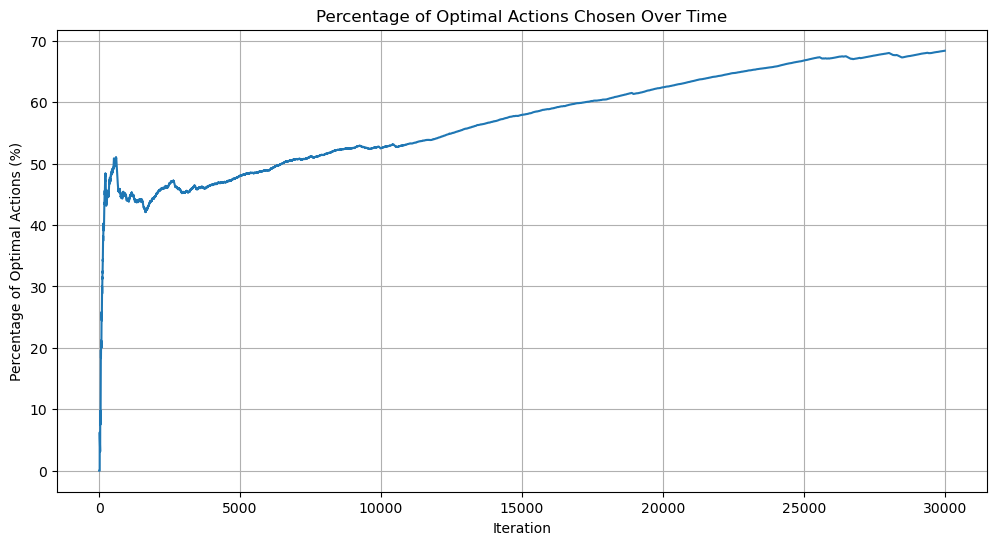

In [42]:
# 30,000 recursion epsilon =0.5 dec by 0.1 every 5000 iteratons till it reaces 0.1 and stays constant
# alpha = 0.3



class Non_Stationary:
    def __init__(self, k, max_iterations):
        self.k = k
        self.alpha = 0.3
        self.max_iterations = max_iterations
        self.reward = np.zeros(k)
        self.values = np.full(k, 10.0)
        self.all_rewards = [[] for _ in range(k)]  # Use lists instead of fixed-size arrays
        self.times = np.zeros(k)
    
    def value_change(self):
        for i in range(self.k):
            self.values[i] += np.random.normal(loc=0, scale=0.01)
    
    def get_reward(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        reward = np.random.normal(loc=self.values[i], scale=0.01)
        self.all_rewards[i].append(reward)  # Append to list instead of indexing
        self.times[i] += 1
        return reward
        
    def reward_estimation(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        if t == 0:
            return 0
        q = 0
        for j in range(t):
            q += self.alpha * (1 - self.alpha)**(t - j - 1) * self.all_rewards[i][j]
        self.reward[i] = q
        return q

# Main execution
num_iterations = 30000
object = Non_Stationary(10, num_iterations)
epsilon = 0.5
total_reward = 0
optimal_actions = []
chosen_optimal = []

for x in range(num_iterations):
    if x > 0:
        object.value_change()
    
    # Determine the optimal action
    optimal_action = np.argmax(object.values)
    optimal_actions.append(optimal_action)
    
    if np.random.uniform(0, 1) > epsilon:
        action = int(np.argmax([object.reward_estimation(i) for i in range(object.k)]))
    else:
        action = random.randint(0, object.k-1)
    
    # Check if chosen action was optimal
    chosen_optimal.append(action == optimal_action)
    
    rew = object.get_reward(action)
    est = object.reward_estimation(action)
    total_reward += rew
    if x % 6000 == 0 and x > 0:
        epsilon = max(0.1, epsilon - 0.1)
print(f"Final Total Reward: {total_reward}")
print(f"Estimated Action Values: {object.reward}")
print(f"True Action Values: {object.values}")

# Calculate the percentage of optimal actions chosen
optimal_percentage = [sum(chosen_optimal[:i+1]) / (i+1) * 100 for i in range(num_iterations)]

# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_iterations + 1), optimal_percentage)
plt.title('Percentage of Optimal Actions Chosen Over Time')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Optimal Actions (%)')
plt.grid(True)
plt.show()

Final Total Reward: 590867.9548546177
Estimated Action Values: [14.23880737 11.38878305  8.30210678  6.24373984 10.79002946  9.22332994
  7.39153059 11.89157525  9.95222186  7.92994375]
True Action Values: [14.24067494 11.49470531  8.21051428  6.21349675 11.03795317  9.42580956
  7.13242634 11.46063357  9.9683142   7.78610221]


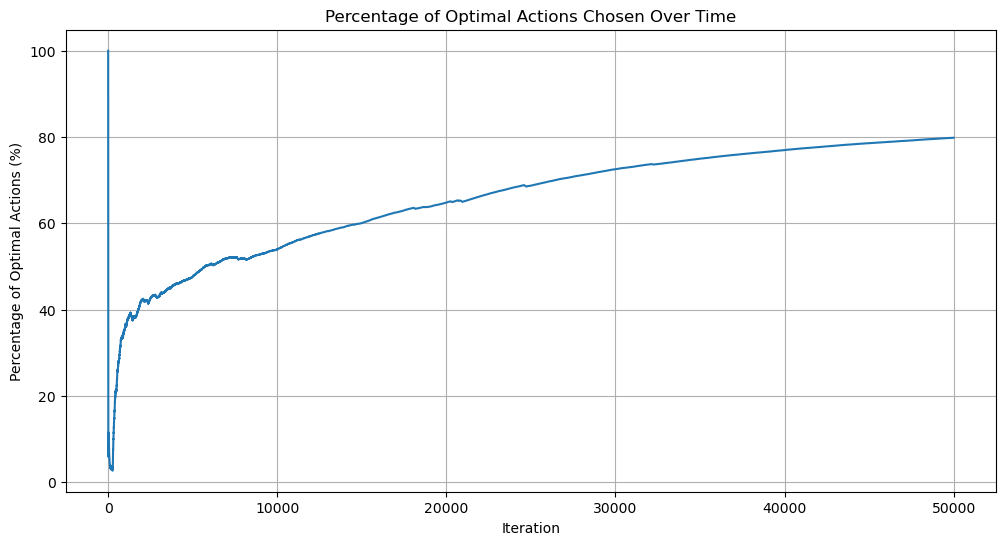

In [43]:
# 30,000 recursion epsilon =0.5 dec by 0.1 every 5000 iteratons
# alpha = 0.3



class Non_Stationary:
    def __init__(self, k, max_iterations):
        self.k = k
        self.alpha = 0.3
        self.max_iterations = max_iterations
        self.reward = np.zeros(k)
        self.values = np.full(k, 10.0)
        self.all_rewards = [[] for _ in range(k)]  # Use lists instead of fixed-size arrays
        self.times = np.zeros(k)
    
    def value_change(self):
        for i in range(self.k):
            self.values[i] += np.random.normal(loc=0, scale=0.01)
    
    def get_reward(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        reward = np.random.normal(loc=self.values[i], scale=0.01)
        self.all_rewards[i].append(reward)  # Append to list instead of indexing
        self.times[i] += 1
        return reward
        
    def reward_estimation(self, i):
        if i < 0 or i >= self.k:
            raise ValueError(f"Invalid action. Should be between 0 and {self.k-1}")
        t = int(self.times[i])
        if t == 0:
            return 0
        q = 0
        for j in range(t):
            q += self.alpha * (1 - self.alpha)**(t - j - 1) * self.all_rewards[i][j]
        self.reward[i] = q
        return q

# Main execution
num_iterations = 50000
object = Non_Stationary(10, num_iterations)
epsilon = 0.5
total_reward = 0
optimal_actions = []
chosen_optimal = []

for x in range(num_iterations):
    if x > 0:
        object.value_change()
    
    # Determine the optimal action
    optimal_action = np.argmax(object.values)
    optimal_actions.append(optimal_action)
    
    if np.random.uniform(0, 1) > epsilon:
        action = int(np.argmax([object.reward_estimation(i) for i in range(object.k)]))
    else:
        action = random.randint(0, object.k-1)
    
    # Check if chosen action was optimal
    chosen_optimal.append(action == optimal_action)
    
    rew = object.get_reward(action)
    est = object.reward_estimation(action)
    total_reward += rew
    if x % 5000 == 0 and x > 0:
        epsilon = max(0.1, epsilon - 0.1)
print(f"Final Total Reward: {total_reward}")
print(f"Estimated Action Values: {object.reward}")
print(f"True Action Values: {object.values}")

# Calculate the percentage of optimal actions chosen
optimal_percentage = [sum(chosen_optimal[:i+1]) / (i+1) * 100 for i in range(num_iterations)]

# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_iterations + 1), optimal_percentage)
plt.title('Percentage of Optimal Actions Chosen Over Time')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Optimal Actions (%)')
plt.grid(True)
plt.show()

In [ ]:
# 80% of optimal option selection is the cap achieved through various different variations of epsilon and alpha